In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy
from scipy.stats import norm, poisson
%matplotlib inline

Statistics:

- $\hat{\mu}$: best estimate for $\mu$ from the observed data (can fluctuate).
  
  It has the following properties:
  - $E[\hat{\mu}] = \mu'$
  - $D^{2}[\hat{\mu}] = \sigma^{2}$
  
- $\mu'$: the actual true value of $\mu$ that is realised in Nature.
- $\mu$

The **p-value** measures the discrepancy between data and the hypothesis.


**Asimov data:** $\hat{\mu} = \mu'$

In [2]:
backgr_exp = 100.0
backgr_unc = np.sqrt(backgr_exp)
nsamples = 100000

In [3]:
backgr_samples = poisson.rvs(mu=backgr_exp, loc=0, size=nsamples)

In [4]:
poisson.pmf(k=100.0, mu=backgr_exp, loc=0)

0.039860996809148827

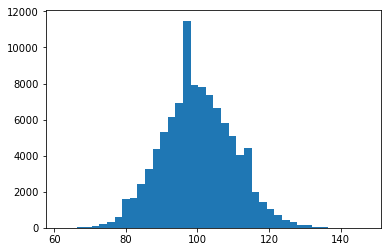

In [5]:
plt.hist(backgr_samples, bins=40);

## Likelihood - $\mathcal{L}$

In [6]:
def likelihood(bkg, obs_events, mu, s0=1.0):
    sig = mu * s0
    exp = bkg + sig
    likelihood = poisson.pmf(obs_events, mu=exp)
    return likelihood

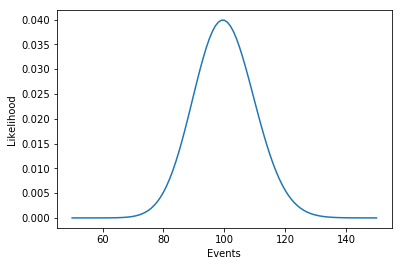

In [7]:
events      = np.linspace(50.0, 150.0, 101, endpoint=True);
likelihoods = likelihood(bkg=100, obs_events=events, mu=0.0);
f, a = plt.subplots();
a.plot(events,likelihoods);
a.set_xlabel('Events');
a.set_ylabel('Likelihood');

## Test statistic - $t_{\mu}$

In [8]:
def tmu(bkg, obs_events, mu, s0=1.0):
    muhat = (obs_events-bkg)/s0
    l1 = likelihood(bkg=bkg, obs_events=obs_events, mu=mu)
    l2 = likelihood(bkg=bkg, obs_events=obs_events, mu=muhat)
    tmu = - 2.0 * np.log(l1/l2)
    return tmu

### Test statistic as a function of $N_{obs, events}$

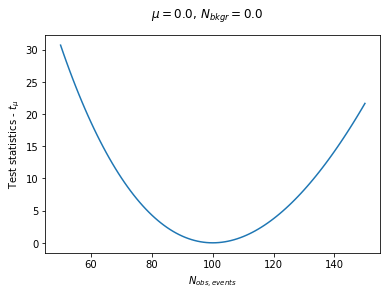

In [9]:
bkg = 100.0
mu  = 0.0
obs_events = np.linspace(50.0, 150.0, 101, endpoint=True);
tmus = tmu(bkg=100.0, obs_events=obs_events, mu=mu)
f, a = plt.subplots();
a.plot(obs_events, tmus);
a.set_xlabel(r'$N_{obs, events}$');
a.set_ylabel(r'Test statistics - $t_{\mu}$');
f.suptitle(r"$\mu = 0.0$, $N_{{bkgr}} = {}$".format(mu, bkg) );

### Test statistic as a function of $\mu$

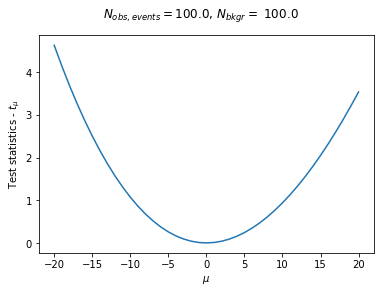

In [10]:
bkg = 100.0
obs_events = 100.0
mus = np.linspace(-20.0, 20.0, 41, endpoint=True);
tmus = tmu(bkg=bkg, obs_events=obs_events, mu=mus)
f, a = plt.subplots();
a.plot(mus, tmus);
a.set_xlabel('$\mu$');
a.set_ylabel(r'Test statistics - $t_{\mu}$');
f.suptitle(r"$N_{{obs, events}} = {}$, $N_{{bkgr}} =$ {}".format(obs_events, bkg));

### Distribution of test statistic

### $\mu = 0.0$

In [52]:
mu         = 0.0
exp_events = 1000.0 
nsamples   = 100000
obs_events = poisson.rvs(mu=exp_events, loc=0, size=nsamples, random_state=40)
tmus = tmu(bkg=exp_events, obs_events=obs_events, mu=mu)
sqrt_tmus = np.sqrt(tmus)

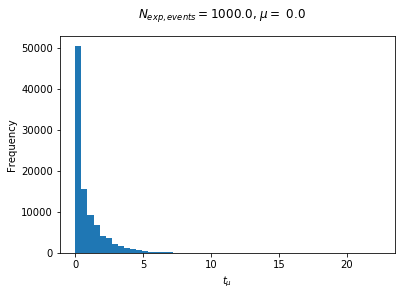

In [53]:
f, a = plt.subplots();
a.hist(tmus, bins=50);
a.set_xlabel('$t_{\mu}$');
a.set_ylabel(r'Frequency');
f.suptitle(r"$N_{{exp, events}} = {}$, $\mu =$ {}".format(exp_events, mu));

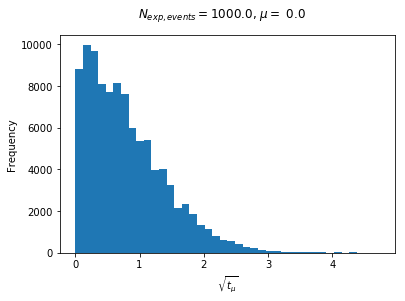

In [54]:
f, a = plt.subplots();
a.hist(sqrt_tmus, bins=40);
a.set_xlabel('$\sqrt{t_{\mu}}$');
a.set_ylabel(r'Frequency');
f.suptitle(r"$N_{{exp, events}} = {}$, $\mu =$ {}".format(exp_events, mu));

### $\mu = 100.0$

In [55]:
mu         = 40.0
exp_events = 1000.0 
nsamples   = 100000
obs_events = poisson.rvs(mu=exp_events, loc=0, size=nsamples, random_state=40)
tmus = tmu(bkg=exp_events, obs_events=obs_events, mu=mu)
sqrt_tmus = np.sqrt(tmus)

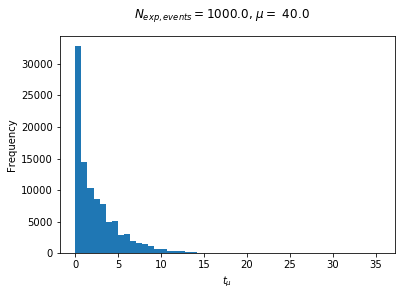

In [56]:
f, a = plt.subplots();
a.hist(tmus, bins=50);
a.set_xlabel('$t_{\mu}$');
a.set_ylabel(r'Frequency');
f.suptitle(r"$N_{{exp, events}} = {}$, $\mu =$ {}".format(exp_events, mu));

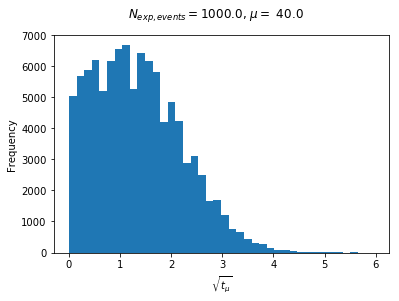

In [57]:
f, a = plt.subplots();
a.hist(sqrt_tmus, bins=40);
a.set_xlabel('$\sqrt{t_{\mu}}$');
a.set_ylabel(r'Frequency');
f.suptitle(r"$N_{{exp, events}} = {}$, $\mu =$ {}".format(exp_events, mu));